### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [231]:
data = pd.read_csv('data/coupons.csv')

In [232]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [234]:
data.describe()

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

2. Investigate the dataset for missing or problematic data.

In [235]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

3. Decide what to do about your missing data -- drop, replace, other...

Since most of the rows in 'car' column are blank, it's not useful for statistical analysis. 'Car' column is dropped.

In [237]:
data = data.drop(['car'], axis=1)

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

Since 'direction_opp' can be derived from 'direction_same' column, 'direction_opp' column is dropped. 

In [239]:
data = data.drop(['direction_opp'], axis=1)

Drop rows with null values 
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189

In [240]:
data = data.dropna()

In [241]:
data.drop_duplicates(inplace = True)

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 22 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-nul

In [243]:
data['toCoupon_GEQ5min'].value_counts('normalize = True')

1    1.0
Name: toCoupon_GEQ5min, dtype: float64

Since 'toCoupon_GEQ5min' has only one value for all rows. It is dropped.

In [244]:
data = data.drop(['toCoupon_GEQ5min'], axis=1)

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 22 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-nul

'age' column has mix of numeric and character values. Replacing character values to numeric.

In [246]:
data.replace({"age" : {"50plus": "50", "below21" : "18"} }, inplace = True)

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 22 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-nul

In [248]:
data["age"] = pd.to_numeric(data["age"])

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 22 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  int64 
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-nul

4. What proportion of the total observations chose to accept the coupon? 



In [250]:
data['Y'].value_counts('normalize = True')

1    0.568418
0    0.431582
Name: Y, dtype: float64

### 57% accepted coupon
### 43% did not accept coupon

In [251]:
data.groupby(["coupon"])['Y'].value_counts('normalize = True')

coupon                 Y
Bar                    0    0.588143
                       1    0.411857
Carry out & Take away  1    0.735781
                       0    0.264219
Coffee House           0    0.504332
                       1    0.495668
Restaurant(20-50)      0    0.553432
                       1    0.446568
Restaurant(<20)        1    0.709751
                       0    0.290249
Name: Y, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Bar'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

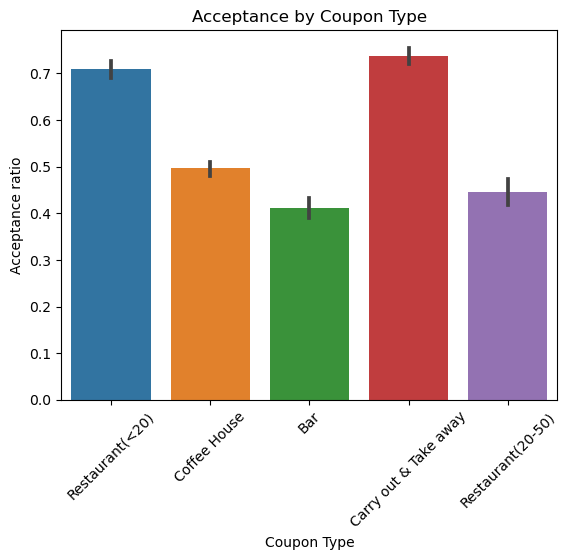

In [64]:
sns.barplot(data = data, x = 'coupon', y = 'Y')
plt.title('Acceptance by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance ratio')
plt.xticks(rotation=45)

### Coupon type of Carry out & Take away has the highest acceptance ratio (74%) followed by Restaurant(<20) (71%) . Coupon type of Bar has the lowest acceptance ratio (41%).

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Bar'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

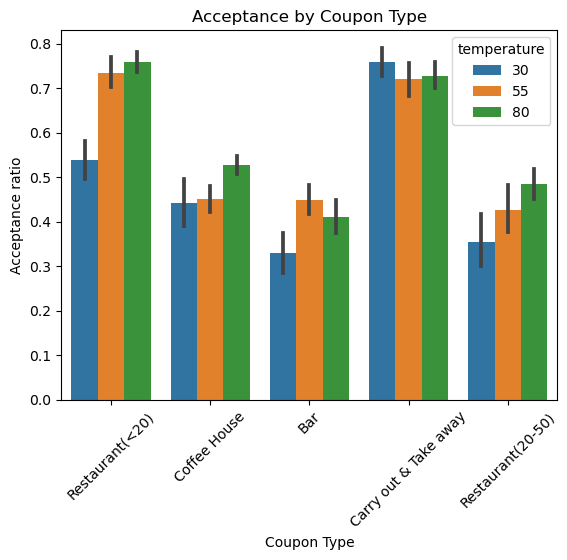

In [350]:
sns.barplot(data = data, x = 'coupon', y = 'Y', hue = 'temperature')
plt.title('Acceptance by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance ratio')
plt.xticks(rotation=45)

### Acceptance ratio is lower at low temperatures (30-degress) except for Carry out & Take away coupon types. 

In [390]:
ans1 = data.groupby('temperature')[['Y']].sum().sort_values(by = 'Y', ascending = False).reset_index()
fig = px.bar(ans1,x='temperature', y = 'Y', title="Count By Temperature", color = 'Y', labels={"Y": "Coupon Acceptance"})
fig.show()

6. Use a histogram to visualize the temperature column.

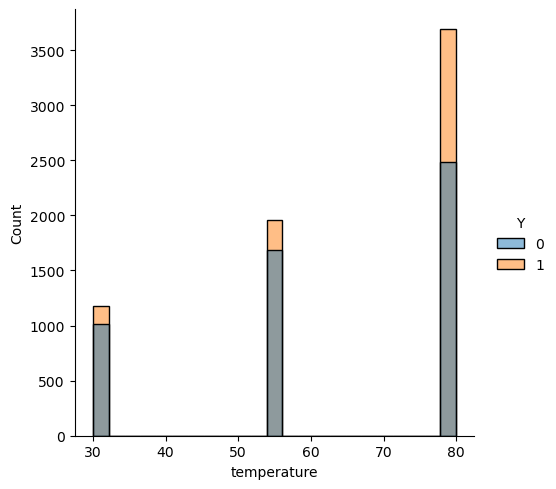

In [254]:
sns.displot(data=data, x="temperature", hue = "Y")

### Acceptance ratio is more at high temerature (80 degrees)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [257]:
df2 = data.query('coupon == "Bar"')

In [258]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 24 to 12682
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1906 non-null   object
 1   passanger             1906 non-null   object
 2   weather               1906 non-null   object
 3   temperature           1906 non-null   int64 
 4   time                  1906 non-null   object
 5   coupon                1906 non-null   object
 6   expiration            1906 non-null   object
 7   gender                1906 non-null   object
 8   age                   1906 non-null   int64 
 9   maritalStatus         1906 non-null   object
 10  has_children          1906 non-null   int64 
 11  education             1906 non-null   object
 12  occupation            1906 non-null   object
 13  income                1906 non-null   object
 14  Bar                   1906 non-null   object
 15  CoffeeHouse           1906 non-null 

In [259]:
df2.head()

destination  passanger weather  temperature  time coupon expiration  \
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   
39             Work      Alone   Sunny           55   7AM    Bar         1d   
46  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
57             Home      Alone   Sunny           55   6PM    Bar         1d   

   gender  age maritalStatus  ...           income    Bar CoffeeHouse  \
24   Male   21        Single  ...  $62500 - $74999  never       less1   
35   Male   21        Single  ...  $62500 - $74999  never       less1   
39   Male   21        Single  ...  $62500 - $74999  never       less1   
46   Male   46        Single  ...  $12500 - $24999  never         4~8   
57   Male   46        Single  ...  $12500 - $24999  never         4~8   

   CarryAway RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ15min  \
24       4~8                  4~8            less1                 0   
35       4~8                  4~8            less1                 0   
39       4~8                  4~8            less1                 1   
46       1~3                  1~3            never                 0   
57       1~3                  1~3            never                 0   

   toCoupon_GEQ25min direction_same  Y  
24                 0              0  1  
35                 0              1  1  
39                 1              0  1  
46                 0              0  0  
57                 0              1  0  

[5 rows x 23 columns]

2. What proportion of bar coupons were accepted?


In [270]:
round(df2['Y'].value_counts('normalize = True')[1], 2)

0.41

### Overall, 41% of Bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [271]:
to_bar_3_or_less = df2.query('Bar in ["1~3", "never", "less1"]')['Y'].value_counts('normalize = True')[1]
to_bar_more_than_3 = df2.query('Bar in ["4~8", "gt8"]')['Y'].value_counts('normalize = True')[1]
print(round(to_bar_3_or_less, 2), round(to_bar_more_than_3, 2))

0.37 0.76


### Rate of acceptance of Bar coupon by drivers who went to a bar 3 or fewer times a month is 37%
### Rate of acceptance of Bar coupon by drivers who went to a bar more than 3 times a month is 76%

### Bar coupons are twice as likely to be accepted by drivers who go to bar more than 3 times a month than all others.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [272]:
to_bar_more_than_once_and_over_25 = df2.query('Bar in ["1~3", "4~8", "gt8"] and age > 25')['Y'].value_counts('normalize = True')[1]

others = df2.query('Bar in ["never", "less1"] and age < 26')['Y'].value_counts('normalize = True')[1]
print(round(to_bar_more_than_once_and_over_25, 2), round(others, 2))

0.69 0.39


### Rate of acceptance of 'Bar' coupon by drivers who go to a bar more than once a month and are over the age of 25 is 69%
### Rate of acceptance of 'Bar' coupon by all others is 39%

### Bar coupons are far more likely (69%) to be accepted by drivers who go to bar more than once a month and are over the age of 25 than all others (39%).

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [273]:
to_bar_more_than_once_and_no_kids_no_fff = df2.query('Bar in ["1~3", "4~8", "gt8"] and passanger != "Kid(s)" and occupation != "Farming Fishing & Forestry"')['Y'].value_counts('normalize = True')[1]
round(to_bar_more_than_once_and_no_kids_no_fff, 2)

0.71

### Rate of acceptance of 'Bar' coupon by drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 71%

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [274]:
query_string_1 = '(Bar in ["1~3", "4~8", "gt8"] and passanger != "Kid(s)" and maritalStatus != "Widowed") ' 
query_string_2 = '(Bar in ["1~3", "4~8", "gt8"] and age < 30) ' 
query_string_3 = '(RestaurantLessThan20 in ["4~8", "gt8"] and income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$25000 - $37499"]) ' 
query_string = query_string_1 + " or " + query_string_2 + " or " + query_string_3
query_string

var = df2.query(query_string)['Y'].value_counts('normalize = True')[1]
round(var, 2)


0.61

In [320]:
query_string_1 = '(Bar in ["1~3"]) ' 
var = df2.query(query_string)['Y'].value_counts('normalize = True')[1]
round(var, 2)

0.61

### Rate of acceptance of 'Bar' coupon by drivers who are part of either of the 3 criteria above is 61%.

In [275]:
var1 = df2.query(query_string_1)['Y'].value_counts('normalize = True')[1]
round(var1, 2)

0.71

### Rate of acceptance of 'Bar' coupon by drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 71%.

In [276]:
var2 = df2.query(query_string_2)['Y'].value_counts('normalize = True')[1]
round(var2, 2)

0.72

### Rate of acceptance of 'Bar' coupon by drivers who go to bars more than once a month and are under the age of 30 is 72%

In [278]:
var3 = df2.query(query_string_3)['Y'].value_counts('normalize = True')[1]
round(var3, 2)

0.44

### Rate of acceptance of 'Bar' coupon by drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is 44%.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Overall, 41% of Bar coupons were accepted in this sample population is the lowest rate of acceptance compared to other types of coupons. 
   
### Bar coupons are twice as likely to be accepted by drivers who go to bar more than 3 times a month than all others.
### Bar coupons are far more likely (69%) to be accepted by drivers who go to bar more than once a month and are over the age of 25 than all others (39%).

### Rate of acceptance of 'Bar' coupon by drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is 44%.

### In general, we can hypothesize that Bar coupons are highly likely to be accepted by drivers who go to Bars more than once a month. Drivers who never go to Bars or go to bars less than once per year are less likely to accept Bar coupons.  

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [279]:
data.groupby(["coupon", "destination"])['Y'].value_counts('normalize = True')

coupon                 destination      Y
Bar                    Home             0    0.547917
                                        1    0.452083
                       No Urgent Place  0    0.587137
                                        1    0.412863
                       Work             0    0.632035
                                        1    0.367965
Carry out & Take away  Home             1    0.791262
                                        0    0.208738
                       No Urgent Place  1    0.760518
                                        0    0.239482
                       Work             1    0.652616
                                        0    0.347384
Coffee House           Home             0    0.637698
                                        1    0.362302
                       No Urgent Place  1    0.577148
                                        0    0.422852
                       Work             0    0.560000
                                        

### Drivers with destination 'No Urgent Place' have higher likelihood (79%) of accepting Restaurant(<20) coupons as compared with other destinations. 

In [384]:
px.histogram(data, x="destination", color = "Y", labels={"Y": "Coupon Acceptance"})


In [361]:
data.groupby(["coupon", "passanger"])['Y'].value_counts('normalize = True')

coupon                 passanger  Y
Bar                    Alone      0    0.590869
                                  1    0.409131
                       Friend(s)  1    0.566456
                                  0    0.433544
                       Kid(s)     0    0.791667
                                  1    0.208333
                       Partner    0    0.613900
                                  1    0.386100
Carry out & Take away  Alone      1    0.729375
                                  0    0.270625
                       Friend(s)  1    0.758865
                                  0    0.241135
                       Kid(s)     1    0.695035
                                  0    0.304965
                       Partner    1    0.711111
                                  0    0.288889
Coffee House           Alone      0    0.566388
                                  1    0.433612
                       Friend(s)  1    0.596760
                                  0    0.403240
    

 ### Bar coupons are less likely to be accepted (only 21%) when passengers are kids.
 ### Restaurant(<20)  coupons are highly likely to be accepted (80%) when passengers are friends 

In [362]:
px.histogram(data, x="passanger", color = "Y", labels={"Y": "Coupon Acceptance"})

In [281]:
data.groupby(["coupon", "weather"])['Y'].value_counts('normalize = True')

coupon                 weather  Y
Bar                    Rainy    0    0.637037
                                1    0.362963
                       Snowy    0    0.675556
                                1    0.324444
                       Sunny    0    0.557210
                                1    0.442790
Carry out & Take away  Rainy    1    0.608696
                                0    0.391304
                       Snowy    1    0.713793
                                0    0.286207
                       Sunny    1    0.762774
                                0    0.237226
Coffee House           Rainy    1    0.516279
                                0    0.483721
                       Snowy    0    0.570423
                                1    0.429577
                       Sunny    0    0.500000
                                1    0.500000
Restaurant(20-50)      Rainy    0    0.619048
                                1    0.380952
                       Snowy    0    0.684524


###  Interesting - There is less Carry out & Take away when weather is Rainy (61%) than when it's Snowy(71%). There is much higher likelihood of accepting (77%) Restaurant(<20) when weather is Sunny compared to when it's Rainy or Snowy. 

In [388]:
px.histogram(data, x="weather", color = "Y", labels={"Y": "Coupon Acceptance"})

In [282]:
data.groupby(["coupon", "temperature"])['Y'].value_counts('normalize = True')

coupon                 temperature  Y
Bar                    30           0    0.670854
                                    1    0.329146
                       55           0    0.550549
                                    1    0.449451
                       80           0    0.590301
                                    1    0.409699
Carry out & Take away  30           1    0.759155
                                    0    0.240845
                       55           1    0.719780
                                    0    0.280220
                       80           1    0.727738
                                    0    0.272262
Coffee House           30           0    0.557047
                                    1    0.442953
                       55           0    0.548891
                                    1    0.451109
                       80           1    0.526155
                                    0    0.473845
Restaurant(20-50)      30           0    0.644531
            

### Restaurant(<20) coupons are much less likely to be accepted (54%) when temperature is low (30-degrees) compared to when the temperatures are higher (55-degrees or 80-degrees)         

In [283]:
data.groupby(["coupon", "time"])['Y'].value_counts('normalize = True')

coupon                 time  Y
Bar                    10AM  0    0.632212
                             1    0.367788
                       10PM  0    0.535620
                             1    0.464380
                       2PM   0    0.663717
                             1    0.336283
                       6PM   0    0.537313
                             1    0.462687
                       7AM   0    0.632035
                             1    0.367965
Carry out & Take away  10AM  1    0.698770
                             0    0.301230
                       10PM  1    0.766590
                             0    0.233410
                       2PM   1    0.866029
                             0    0.133971
                       6PM   1    0.819951
                             0    0.180049
                       7AM   1    0.652616
                             0    0.347384
Coffee House           10AM  1    0.634346
                             0    0.365654
                       

### Carry out & Take away coupons are highly likely to be accepted (87%) at 2PM   

In [386]:
px.histogram(data, x="time", color = "Y", labels={"Y": "Coupon Acceptance"})

In [284]:
data.groupby(["coupon", "expiration"])['Y'].value_counts('normalize = True')

coupon                 expiration  Y
Bar                    1d          0    0.584521
                                   1    0.415479
                       2h          0    0.600462
                                   1    0.399538
Carry out & Take away  1d          1    0.784707
                                   0    0.215293
                       2h          1    0.661400
                                   0    0.338600
Coffee House           1d          1    0.579727
                                   0    0.420273
                       2h          0    0.571159
                                   1    0.428841
Restaurant(20-50)      1d          1    0.524283
                                   0    0.475717
                       2h          0    0.692308
                                   1    0.307692
Restaurant(<20)        1d          1    0.835531
                                   0    0.164469
                       2h          1    0.590273
                                

### Restaurant(<20) coupons are  have higher likelihood of being accepted (84%) if the expiration is 1 day (1d)         as compared to when expiration is 2 hours (2h). 

In [ ]:
px.histogram(data, x="", color = "Y", labels={"Y": "Coupon Acceptance"})

In [285]:
data.groupby(["coupon", "gender"])['Y'].value_counts('normalize = True')

coupon                 gender  Y
Bar                    Female  0    0.658241
                               1    0.341759
                       Male    0    0.512541
                               1    0.487459
Carry out & Take away  Female  1    0.713415
                               0    0.286585
                       Male    1    0.759447
                               0    0.240553
Coffee House           Female  0    0.509664
                               1    0.490336
                       Male    1    0.501356
                               0    0.498644
Restaurant(20-50)      Female  0    0.571027
                               1    0.428973
                       Male    0    0.535613
                               1    0.464387
Restaurant(<20)        Female  1    0.699405
                               0    0.300595
                       Male    1    0.720430
                               0    0.279570
Name: Y, dtype: float64

In [ ]:
px.histogram(data, x="", color = "Y", labels={"Y": "Coupon Acceptance"})

In [286]:
data.groupby(["coupon", "maritalStatus"])['Y'].value_counts('normalize = True')

coupon                 maritalStatus      Y
Bar                    Divorced           0    0.767123
                                          1    0.232877
                       Married partner    0    0.675545
                                          1    0.324455
                       Single             1    0.553292
                                          0    0.446708
                       Unmarried partner  0    0.602273
                                          1    0.397727
                       Widowed            0    0.588235
                                          1    0.411765
Carry out & Take away  Divorced           1    0.718447
                                          0    0.281553
                       Married partner    1    0.727170
                                          0    0.272830
                       Single             1    0.755814
                                          0    0.244186
                       Unmarried partner  1    0.707989
    

### Bar  coupons are more likely to be accepted (55%) by Singles than by drivers with other marital statuses.   Carry out & Take away coupons are more likely to be accepted by Widowed (85%) than by drivers other marital statuses. Widowed are highly unlikely to accept (21%) Restaurant(20-50) coupons.

In [378]:
px.histogram(data, x="maritalStatus", color = "Y", labels={"Y": "Coupon Acceptance"})

In [166]:
data.groupby(["coupon", "has_children"])['Y'].value_counts('normalize = True')

coupon                 has_children  Y
Bar                    0             0    0.502283
                                     1    0.497717
                       1             0    0.702934
                                     1    0.297066
Carry out & Take away  0             1    0.736882
                                     0    0.263118
                       1             1    0.738860
                                     0    0.261140
Coffee House           0             1    0.501695
                                     0    0.498305
                       1             0    0.512363
                                     1    0.487637
Restaurant(20-50)      0             0    0.524876
                                     1    0.475124
                       1             0    0.592170
                                     1    0.407830
Restaurant(<20)        0             1    0.719287
                                     0    0.280713
                       1             1    0

## Drivers with children are less likely to accept (29%) Bar coupons  

In [377]:
px.histogram(data, x="has_children", color = "Y", labels={"Y": "Coupon Acceptance"})

In [167]:
data.groupby(["coupon", "education"])['Y'].value_counts('normalize = True')

coupon                 education                               Y
Bar                    Associates degree                       0    0.700565
                                                               1    0.299435
                       Bachelors degree                        0    0.584786
                                                               1    0.415214
                       Graduate degree (Masters or Doctorate)  0    0.629771
                                                               1    0.370229
                       High School Graduate                    0    0.594406
                                                               1    0.405594
                       Some High School                        1    0.785714
                                                               0    0.214286
                       Some college - no degree                0    0.552478
                                                               1    0.447522
Carry out &

### Drivers with Some High School education have very high tendency to accept Carry out & Take away coupons (94%) and high tendency to accept Bar coupons (79%).

In [376]:
px.histogram(data, x="education", color = "Y", labels={"Y": "Coupon Acceptance"})

In [287]:
data.groupby(["coupon", "occupation"])['Y'].value_counts('normalize = True')

coupon           occupation                                 Y
Bar              Architecture & Engineering                 1    0.666667
                                                            0    0.333333
                 Arts Design Entertainment Sports & Media   0    0.670455
                                                            1    0.329545
                 Building & Grounds Cleaning & Maintenance  0    0.714286
                                                                   ...   
Restaurant(<20)  Student                                    0    0.285276
                 Transportation & Material Moving           1    0.739130
                                                            0    0.260870
                 Unemployed                                 1    0.670025
                                                            0    0.329975
Name: Y, Length: 249, dtype: float64

In [288]:
data.groupby(["coupon", "income"])['Y'].value_counts('normalize = True')

coupon           income            Y
Bar              $100000 or More   0    0.519713
                                   1    0.480287
                 $12500 - $24999   0    0.579336
                                   1    0.420664
                 $25000 - $37499   0    0.546667
                                          ...   
Restaurant(<20)  $75000 - $87499   0    0.311475
                 $87500 - $99999   1    0.576923
                                   0    0.423077
                 Less than $12500  1    0.719298
                                   0    0.280702
Name: Y, Length: 90, dtype: float64

In [289]:
data.groupby(["coupon", "Bar"])['Y'].value_counts('normalize = True')

coupon                 Bar    Y
Bar                    1~3    1    0.646438
                              0    0.353562
                       4~8    1    0.775510
                              0    0.224490
                       gt8    1    0.717391
                              0    0.282609
                       less1  0    0.553114
                              1    0.446886
                       never  0    0.810914
                              1    0.189086
Carry out & Take away  1~3    1    0.759009
                              0    0.240991
                       4~8    1    0.729730
                              0    0.270270
                       gt8    1    0.564516
                              0    0.435484
                       less1  1    0.716108
                              0    0.283892
                       never  1    0.750820
                              0    0.249180
Coffee House           1~3    1    0.500678
                              0    0.499322


### Drivers who never go to bars, are unlikely to to accept Bar coupons (19%). Drivers who go to bars more than 8 times, are less likely to accept Carry out & Take away (56%) compared to all others.      
 

In [370]:
px.histogram(data, x="Bar", color = "Y", labels={"Y": "Coupon Acceptance"})

In [290]:
data.groupby(["coupon", "CoffeeHouse"])['Y'].value_counts('normalize = True')

coupon                 CoffeeHouse  Y
Bar                    1~3          0    0.539095
                                    1    0.460905
                       4~8          0    0.543071
                                    1    0.456929
                       gt8          0    0.551724
                                    1    0.448276
                       less1        0    0.622180
                                    1    0.377820
                       never        0    0.642058
                                    1    0.357942
Carry out & Take away  1~3          1    0.743007
                                    0    0.256993
                       4~8          1    0.728707
                                    0    0.271293
                       gt8          1    0.609302
                                    0    0.390698
                       less1        1    0.757119
                                    0    0.242881
                       never        1    0.759398
            

### Drivers who never go to Coffee House have very low likelihood (18%) of accepting Coffee House coupons. 

In [369]:
px.histogram(data, x="CoffeeHouse", color = "Y", labels={"Y": "Coupon Acceptance"})

In [291]:
data.groupby(["coupon", "CarryAway"])['Y'].value_counts('normalize = True')

coupon                 CarryAway  Y
Bar                    1~3        0    0.585816
                                  1    0.414184
                       4~8        0    0.576562
                                  1    0.423438
                       gt8        0    0.567460
                                  1    0.432540
                       less1      0    0.618881
                                  1    0.381119
                       never      0    0.826087
                                  1    0.173913
Carry out & Take away  1~3        1    0.738650
                                  0    0.261350
                       4~8        1    0.752604
                                  0    0.247396
                       gt8        1    0.749129
                                  0    0.250871
                       less1      1    0.675595
                                  0    0.324405
                       never      1    0.777778
                                  0    0.222222
Coff

 ### Drivers who never Carry Away have very low likelihood (18%) of accepting Bar coupons or Restaurant(<20) coupons (21%). 


In [368]:
px.histogram(data, x="CarryAway", color = "Y", labels={"Y": "Coupon Acceptance"})

In [292]:
data.groupby(["coupon", "RestaurantLessThan20"])['Y'].value_counts('normalize = True')

coupon                 RestaurantLessThan20  Y
Bar                    1~3                   0    0.597139
                                             1    0.402861
                       4~8                   0    0.579817
                                             1    0.420183
                       gt8                   0    0.543011
                                             1    0.456989
                       less1                 0    0.620130
                                             1    0.379870
                       never                 1    0.571429
                                             0    0.428571
Carry out & Take away  1~3                   1    0.727177
                                             0    0.272823
                       4~8                   1    0.744113
                                             0    0.255887
                       gt8                   1    0.756522
                                             0    0.243478
         

### Drivers who never go to RestaurantLessThan20 have a very high likelihood (86%) of accepting Carry out & Take away coupon. 

In [367]:
px.histogram(data, x="RestaurantLessThan20", color = "Y", labels={"Y": "Coupon Acceptance"})

In [293]:
data.groupby(["coupon", "Restaurant20To50"])['Y'].value_counts('normalize = True')

coupon                 Restaurant20To50  Y
Bar                    1~3               0    0.562500
                                         1    0.437500
                       4~8               1    0.630631
                                         0    0.369369
                       gt8               1    0.628571
                                         0    0.371429
                       less1             0    0.614331
                                         1    0.385669
                       never             0    0.655518
                                         1    0.344482
Carry out & Take away  1~3               1    0.741319
                                         0    0.258681
                       4~8               1    0.742857
                                         0    0.257143
                       gt8               1    0.680851
                                         0    0.319149
                       less1             1    0.734247
                      

### Driver who go to  Restaurant20To50 4 or more times are more likely to accept Bar coupons (63%) than all others.

In [366]:
px.histogram(data, x="Restaurant20To50", color = "Y", labels={"Y": "Coupon Acceptance"})

In [294]:
data.groupby(["coupon", "toCoupon_GEQ15min"])['Y'].value_counts('normalize = True')

coupon                 toCoupon_GEQ15min  Y
Bar                    0                  0    0.562112
                                          1    0.437888
                       1                  0    0.601426
                                          1    0.398574
Carry out & Take away  0                  1    0.753012
                                          0    0.246988
                       1                  1    0.725588
                                          0    0.274412
Coffee House           0                  1    0.544262
                                          0    0.455738
                       1                  0    0.549267
                                          1    0.450733
Restaurant(20-50)      0                  0    0.542471
                                          1    0.457529
                       1                  0    0.559777
                                          1    0.440223
Restaurant(<20)        0                  1    0.757328
    

In [365]:
px.histogram(data, x="toCoupon_GEQ15min", color = "Y", labels={"Y": "Coupon Acceptance"})

In [295]:
data.groupby(["coupon", "toCoupon_GEQ25min"])['Y'].value_counts('normalize = True')

coupon                 toCoupon_GEQ25min  Y
Bar                    0                  0    0.580577
                                          1    0.419423
                       1                  0    0.610309
                                          1    0.389691
Carry out & Take away  0                  1    0.735280
                                          0    0.264720
                       1                  1    0.740566
                                          0    0.259434
Coffee House           0                  1    0.508687
                                          0    0.491313
                       1                  0    0.657718
                                          1    0.342282
Restaurant(20-50)      0                  0    0.552914
                                          1    0.447086
                       1                  0    0.559633
                                          1    0.440367
Restaurant(<20)        0                  1    0.756585
    

### Drivers are less likely to accept Restaurant(<20) coupon (33%) or Coffee House coupon (34%) if they have to drive 25 minutes or more to redeem the coupon.

In [364]:
px.histogram(data, x="toCoupon_GEQ25min", color = "Y", labels={"Y": "Coupon Acceptance"})

In [296]:
data.groupby(["coupon", "direction_same"])['Y'].value_counts('normalize = True')

coupon                 direction_same  Y
Bar                    0               0    0.599602
                                       1    0.400398
                       1               0    0.545000
                                       1    0.455000
Carry out & Take away  0               1    0.751355
                                       0    0.248645
                       1               1    0.705416
                                       0    0.294584
Coffee House           0               0    0.511312
                                       1    0.488688
                       1               1    0.525874
                                       0    0.474126
Restaurant(20-50)      0               0    0.558874
                                       1    0.441126
                       1               0    0.526971
                                       1    0.473029
Restaurant(<20)        0               1    0.726685
                                       0    0.273315
     

In [363]:
px.histogram(data, x="direction_same", color = "Y", labels={"Y": "Coupon Acceptance"})

In [297]:
df_numeric = data.copy()
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 22 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  int64 
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-nul

In [298]:
df_numeric.replace({"destination" : {"No Urgent Place" : "1", "Home" : "2", "Work" : "3"}}, inplace = True)

In [299]:
df_numeric["destination"] = pd.to_numeric(df_numeric["destination"])

In [300]:
df_numeric.replace({"weather" : {"Sunny" : "1", "Rainy" : "2", "Snowy" : "3"}}, inplace = True)

In [301]:
df_numeric["weather"] = pd.to_numeric(df_numeric["weather"])

In [302]:
df_numeric.replace({"expiration" : {"1d" : "24", "2h" : "2"}}, inplace = True)

In [303]:
df_numeric["expiration"] = pd.to_numeric(df_numeric["expiration"])

In [304]:
df_numeric.replace({"education" : {"Some High School" : "1", "High School Graduate" : "2", "Some college - no degree" : "3", "Associates degree" : "4", "Bachelors degree" : "5", "Graduate degree (Masters or Doctorate)" : "6"} }, inplace = True)   


In [305]:
df_numeric["education"] = pd.to_numeric(df_numeric["education"])

In [306]:
df_numeric.replace({"income" : {"Less than $12500" : "1", "$12500 - $24999" : "2", "$25000 - $37499" : "3", "$25000 - $37499" : "4", "$37500 - $49999" : "5", "$50000 - $62499" : "6", "$62500 - $74999" : "7", "$75000 - $87499" : "8", "$87500 - $99999" : "9", "$100000 or More" : "10"} }, inplace = True)   


In [307]:
df_numeric["income"] = pd.to_numeric(df_numeric["income"])

In [308]:
df_numeric.replace({"Bar" : {"never" : "0", "less1" : "0.5", "1~3" : "2", "4~8" : "6", "gt8" : "10"} }, inplace = True)   


In [309]:
df_numeric["Bar"] = pd.to_numeric(df_numeric["Bar"])

In [310]:
df_numeric.replace({"CoffeeHouse" : {"never" : "0", "less1" : "0.5", "1~3" : "2", "4~8" : "6", "gt8" : "10"} }, inplace = True)  

In [311]:
df_numeric["CoffeeHouse"] = pd.to_numeric(df_numeric["CoffeeHouse"])

In [312]:
df_numeric.replace({"CarryAway" : {"never" : "0", "less1" : "0.5", "1~3" : "2", "4~8" : "6", "gt8" : "10"} }, inplace = True) 

In [313]:
df_numeric["CarryAway"] = pd.to_numeric(df_numeric["CarryAway"])

In [314]:
df_numeric.replace({"RestaurantLessThan20" : {"never" : "0", "less1" : "0.5", "1~3" : "2", "4~8" : "6", "gt8" : "10"} }, inplace = True)  

In [315]:
df_numeric["RestaurantLessThan20"] = pd.to_numeric(df_numeric["RestaurantLessThan20"])

In [316]:
df_numeric.replace({"Restaurant20To50" : {"never" : "0", "less1" : "0.5", "1~3" : "2", "4~8" : "6", "gt8" : "10"} }, inplace = True)

In [317]:
df_numeric["Restaurant20To50"] = pd.to_numeric(df_numeric["Restaurant20To50"])

In [318]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 22 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12007 non-null  int64  
 1   passanger             12007 non-null  object 
 2   weather               12007 non-null  int64  
 3   temperature           12007 non-null  int64  
 4   time                  12007 non-null  object 
 5   coupon                12007 non-null  object 
 6   expiration            12007 non-null  int64  
 7   gender                12007 non-null  object 
 8   age                   12007 non-null  int64  
 9   maritalStatus         12007 non-null  object 
 10  has_children          12007 non-null  int64  
 11  education             12007 non-null  int64  
 12  occupation            12007 non-null  object 
 13  income                12007 non-null  int64  
 14  Bar                   12007 non-null  float64
 15  CoffeeHouse       

In [319]:
df_numeric.corr()

destination   weather  temperature  expiration  \
destination              1.000000  0.123122    -0.140135    0.062882   
weather                  0.123122  1.000000    -0.643120    0.089966   
temperature             -0.140135 -0.643120     1.000000   -0.129620   
expiration               0.062882  0.089966    -0.129620    1.000000   
age                     -0.019656  0.000581    -0.013640   -0.019853   
has_children            -0.024381 -0.003713    -0.019496   -0.017083   
education               -0.011236 -0.006019     0.011123   -0.015685   
income                  -0.022832  0.007339    -0.020261   -0.018162   
Bar                      0.003420 -0.000819     0.002766   -0.009322   
CoffeeHouse              0.009289  0.020212    -0.017260    0.002369   
CarryAway               -0.001301 -0.004829     0.002796    0.001173   
RestaurantLessThan20    -0.012512 -0.021777     0.031401   -0.010935   
Restaurant20To50        -0.006933  0.027013    -0.020309   -0.002613   
toCoupon_GEQ15min        0.022882  0.136212    -0.157572   -0.046219   
toCoupon_GEQ25min        0.406790  0.234040    -0.226657    0.025003   
direction_same           0.437400 -0.057427     0.098386   -0.033154   
Y                       -0.120283 -0.091770     0.054652    0.131872   

                           age  has_children  education    income       Bar  \
destination          -0.019656     -0.024381  -0.011236 -0.022832  0.003420   
weather               0.000581     -0.003713  -0.006019  0.007339 -0.000819   
temperature          -0.013640     -0.019496   0.011123 -0.020261  0.002766   
expiration           -0.019853     -0.017083  -0.015685 -0.018162 -0.009322   
age                   1.000000      0.439891   0.161061  0.084017 -0.157858   
has_children          0.439891      1.000000   0.090558  0.106906 -0.185042   
education             0.161061      0.090558   1.000000  0.307633 -0.006703   
income                0.084017      0.106906   0.307633  1.000000 -0.005466   
Bar                  -0.157858     -0.185042  -0.006703 -0.005466  1.000000   
CoffeeHouse          -0.033060      0.034203   0.096958 -0.028411  0.237012   
CarryAway            -0.040171     -0.058851  -0.051192  0.004116  0.174780   
RestaurantLessThan20 -0.016143     -0.049528   0.078368  0.091491  0.168560   
Restaurant20To50     -0.040651     -0.020137  -0.028422  0.077574  0.302085   
toCoupon_GEQ15min     0.041774      0.081004   0.022685  0.024556 -0.018958   
toCoupon_GEQ25min    -0.000696     -0.010965   0.002453 -0.004101 -0.000880   
direction_same       -0.031279     -0.033815  -0.004477 -0.026450 -0.009376   
Y                    -0.057668     -0.048010  -0.052992 -0.027899  0.052394   

                      CoffeeHouse  CarryAway  RestaurantLessThan20  \
destination              0.009289  -0.001301             -0.012512   
weather                  0.020212  -0.004829             -0.021777   
temperature             -0.017260   0.002796              0.031401   
expiration               0.002369   0.001173             -0.010935   
age                     -0.033060  -0.040171             -0.016143   
has_children             0.034203  -0.058851             -0.049528   
education                0.096958  -0.051192              0.078368   
income                  -0.028411   0.004116              0.091491   
Bar                      0.237012   0.174780              0.168560   
CoffeeHouse              1.000000   0.232356              0.309521   
CarryAway                0.232356   1.000000              0.418852   
RestaurantLessThan20     0.309521   0.418852              1.000000   
Restaurant20To50         0.241506   0.174698              0.419115   
toCoupon_GEQ15min       -0.003429  -0.009366             -0.010516   
toCoupon_GEQ25min        0.001556  -0.005051             -0.010707   
direction_same           0.003938  -0.001673             -0.010066   
Y                        0.069532   0.027777              0.038860   

                      Restaurant20To50  t

### The highest positive correlation between acceptance is with expiration of coupon (13%). Scale of expiration being {"1d" : "24", "2h" : "2"}.
### The highest negative correlation between acceptance is with destination (-12%). Scale of destination being {"No Urgent Place" : "1", "Home" : "2", "Work" : "3"}.